## Neural Networks as vector operations

You can think of a NN (Neural Network), as a function on vectors. You have linear operations like a Linear Layer or a Convolution and you have non linear operations like your activation function.

In this notebook I want to visualize how these vector operations look like on a 2d vector input.

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F

Set a seed, we want this to be reproducible.

In [101]:
%%capture
torch.manual_seed(1)

In [102]:
origin = [0], [0]

X is a 2d array and our input. It looks like this.

In [103]:
x = torch.Tensor([[0.85,0.9]])

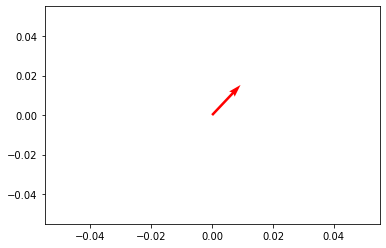

In [104]:
plt.quiver(*origin, x[:,0], x[:,1], color=['r','b','g'], scale=10)
plt.show()

## Linear Layer

After applying the linear layer our output looks like this:

In [105]:
w = torch.randn(2,2) 
x_l = F.linear(x,w)
x_l

tensor([[0.8024, 0.6116]])

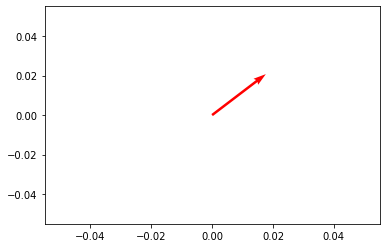

In [106]:
plt.quiver(*origin, x_l[:,0], x_l[:,1], color=['r','b','g'], scale=5)
plt.show()

## ReLU Activation Function

Ok, we can predict what will happen. Because ReLU is this max(0,x). Our output will be [x1,x2]. This is because the ouput of the linear layer was: 

- x1 > 0 --> x1
- x2 > 0 --> x2

In [108]:
x_relu = F.relu(x_l)
x_relu

tensor([[0.8024, 0.6116]])

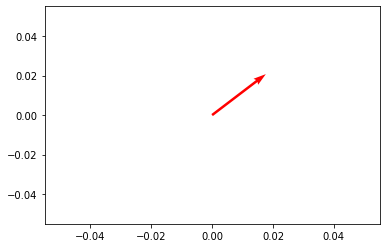

In [109]:
plt.quiver(*origin, x_relu[:,0], x_relu[:,1], color=['r','b','g'], scale=5)
plt.show()

ReLU is very interesting, because it does not change the direction of the vector it just squashes it at (0,0).

I think this is why it is very important to use something like BatchNorm when using ReLU. The vector that is "flowing" through your network could explode really quickly, so you need a squashing mechanism.

If you use something like Sigmoid on the other hand, your vector is alway

## Softmax

This is in my opinion the most interesting part. Say we have a binary classification problem and use softmax to get those probabilities. What we actually measure is which of the dimensions is larger. What the NN is trying to do is to maximize the dimension of the correct class. It is basically a battle between dimensions.

In this case it is this:

In [113]:
x_soft = F.softmax(x_relu, dim=1)
x_soft

tensor([[0.5475, 0.4525]])

We can see that x1 > x2. This means x1 wins this one.